In [1]:
from occultence import *

(0.99, 1.015)

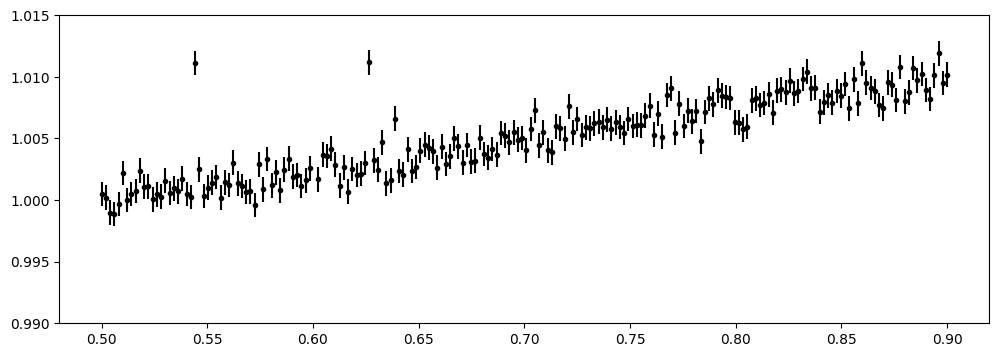

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [5]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

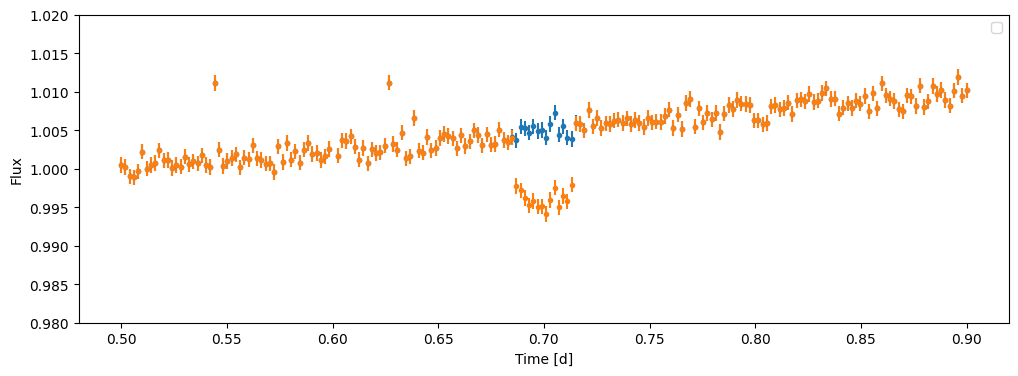

In [6]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [7]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'a': [<Quantity 5.71151244 solRad>],
  'a_Rs': [<Quantity 57.11512439>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [8]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [9]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.017143,0.162210,0.008864,0.799754,0.005375899165087067,0.017057,0.655931,1.9025772534900682 solRad,19.025772534900682,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,-0.174497,0.072158,0.006607,2.484925,0.05189974038232881,0.017464,0.548282,1.4943076902717287 solRad,14.943076902717285,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,-0.149289,0.504560,0.004056,1.957893,0.032219349564998834,0.017132,0.857786,1.5532625790012435 solRad,15.532625790012434,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,-0.079164,0.195322,0.002477,1.290200,0.013991137918484445,0.017149,0.662775,1.7297957407633153 solRad,17.297957407633152,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,-0.226749,0.137340,0.001780,1.105640,0.010274623513991261,0.015093,0.581479,1.3791295053267314 solRad,13.791295053267314,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.178490,0.379487,0.004658,0.948722,0.007565132448155939,0.015428,0.751598,1.4851759693799946 solRad,14.851759693799945,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,-0.187847,0.895342,0.008631,0.888707,0.00663828301793691,0.015167,1.080955,1.4639964510526404 solRad,14.639964510526402,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,-0.152997,0.479706,0.009860,1.039112,0.009075343927880387,0.015730,0.837271,1.5444485741262255 solRad,15.444485741262254,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,-0.202286,0.212289,0.007049,2.077730,0.036284127455852806,0.016570,0.633242,1.4319042981522445 solRad,14.319042981522445,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


In [ ]:
results = targ.full_injection_recovery(nfake=10, pool=False, minimum_planet_radius=0.1 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                       minimum_period=0.5 * u.d, maximum_period=0.5 * u.d, recovery_kw = {'condition_on_epoch':1 * u.hour}, verbose=False)

/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
# results

In [ ]:
results[4]

In [ ]:
results[0][0].metadata

In [ ]:
ax=targ.plot()
for i, lc in enumerate(results[0]):
    lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [51]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

In [52]:
results[3][1].metadata

{'name': 'test_inject1_clean_bin_bls',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.77292618 d>],
  'inc': [<Quantity 1.54780656 rad>],
  'rp': [<Quantity 2.47180143 earthRad>],
  'a': [<Quantity 1.23050805 solRad>],
  'a_Rs': [<Quantity 12.30508053>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.051353>],
  'duration': [<Quantity 0.0154659 d>]},
 'thresholds': {},
 'BLS_transits_found': True,
 'BLS_transits_ind': array([51, 52, 53]),
 'BLS_transits_params': {'period': [<Quantity 0.5 d>],
  'depth': [0.045151290299237146],
  'duration': [<Quantity 0.02 d>],
  'epoch': [<Time object: scale='tdb' format='jd' value=0.7731041666666667>],
  'epoch_start': [<Time object: scale='tdb' format='jd' value=0.7631041666666667>],
  'epoch_end': [<Time object: scale='tdb' format='jd' value=0.7831041666666667>],
  'snr': [78.2043288255705]}}

Text(0.5, 0, 'Planet Radius [R_earth]')

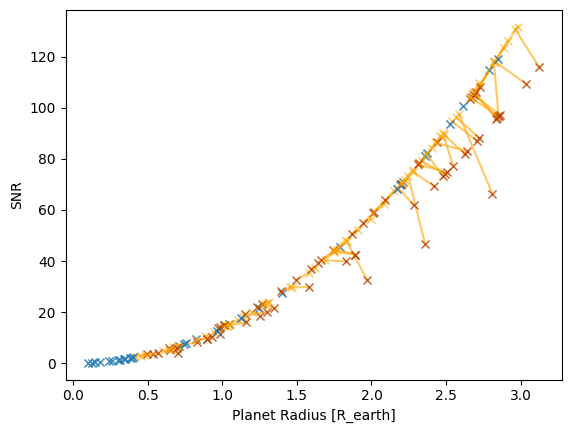

In [119]:
n_points_in_transit = results[4]['duration']/(7.5/(24*60))
lc_noise = 1e-3
rec_r_p = [x.to_value("R_earth") for x in (np.sqrt(results[4]['rec_depth']) * results[4]['r_s']).values]

for r_p, depth, rec, r_p_rec, snr, n in zip(results[4]['r_p'], results[4]['depth'],  results[4]['recovered'],rec_r_p,  results[4]['snr'], n_points_in_transit):
    if rec == 1.0:
        color = "orange"
    else:
        color = "C0"
    if r_p_rec == 0.0:
        r_p_rec = r_p
        snr = depth * np.sqrt(n)/lc_noise
    plt.plot([r_p,r_p_rec], [depth * np.sqrt(n)/lc_noise, snr], 'x-', color=color, alpha=0.6)
    if rec == 1.0:
        plt.plot([r_p_rec], [snr], 'x', color='darkred', alpha=0.5)
plt.ylabel("SNR")
plt.xlabel("Planet Radius [R_earth]")
# plot_transitparams(results[4]['r_p'], results[4]['depth'] * np.sqrt(n_points_in_transit)/lc_noise, results[4]['recovered'], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
#                        xscale='uniform', add_points={}, svname="")

In [89]:
f"{100 * len(results[4].loc[results[4]['recovered'] == 1.0]) /  len(results[4]['recovered'])}%"

'68.0%'

In [127]:
results[3][1].metadata

{'name': 'test_inject1_clean_bin_bls',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.77292618 d>],
  'inc': [<Quantity 1.54780656 rad>],
  'rp': [<Quantity 2.47180143 earthRad>],
  'a': [<Quantity 1.23050805 solRad>],
  'a_Rs': [<Quantity 12.30508053>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.051353>],
  'duration': [<Quantity 0.0154659 d>]},
 'thresholds': {},
 'BLS_transits_found': True,
 'BLS_transits_ind': array([51, 52, 53]),
 'BLS_transits_params': {'period': [<Quantity 0.5 d>],
  'depth': [0.045151290299237146],
  'duration': [<Quantity 0.02 d>],
  'epoch': [<Time object: scale='tdb' format='jd' value=0.7731041666666667>],
  'epoch_start': [<Time object: scale='tdb' format='jd' value=0.7631041666666667>],
  'epoch_end': [<Time object: scale='tdb' format='jd' value=0.7831041666666667>],
  'snr': [78.2043288255705]}}

In [152]:
def split_lightcurve(self, split_every=0.5*u.d):
    t = self.time.value * u.d
    start = t[0]
    nextdays = t[np.absolute(t - start) > split_every]
    split = []

    while nextdays != []:
        start = nextdays[0]
        ind_st = np.where(t == start)[0][0]
        split.append(ind_st)
        time = t[ind_st:]
        nextdays = time[np.absolute(time - start) > split_every]

    times = np.split(t, split)

    return times, split

In [141]:
split_lightcurve_days(results[3][1], split_every=0.5*u.d)[0][0][-1]

/var/folders/hy/dkcmd9g50gzf2r2ccgybcp4c0000gn/T/ipykernel_3731/2257195107.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  while nextdays != []:


<Quantity 0.8984375 d>

In [169]:
self = results[3][1]
transit_mid = self.metadata['injected_planet']['epoch'][0]
duration = self.metadata['injected_planet']['duration'][0]
transit_start = transit_mid - (0.5 * duration)
transit_end = transit_mid + (0.5 * duration)
period = self.metadata['injected_planet']['period'][0]
days = split_lightcurve(self, split_every=0.5*u.d)[0]
observed = 0
for day in days:
    while transit_start <= day[-1]:
        if transit_end >= day[0]:
            overlap = min(transit_end, day[-1]) - max(transit_start, day[0])
            if overlap >= (0.5 * duration):
                observed = 1
        transit_start = transit_start + period
        transit_end = transit_end + period
            

/var/folders/hy/dkcmd9g50gzf2r2ccgybcp4c0000gn/T/ipykernel_3731/2979753610.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  while nextdays != []:


In [148]:
transit_start,transit_mid, transit_end,

(<Quantity 0.76519323 d>, <Quantity 0.77292618 d>, <Quantity 0.78065912 d>)

In [170]:
overlap

<Quantity 0.0154659 d>

In [171]:
observed

1